In [1]:
import sys

import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

from scipy.stats import norm
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)

from tqdm import tqdm

###changes default of autoreloader to continually reload (2) rather than only on restart
####good for debuggin but does slow code as it is continully reloading modules
%load_ext autoreload
%autoreload 2

###can also use dir() to check what is in function and that new params have been loaded

import os
import glob

sys.path.append("../src")
from GECI_freq import main
from summary_plots import plot_instituteData



File location using os.getcwd(): g:\My Drive\WoRMS\data\Ca_waves_data-Elife\data
g:\My Drive\WoRMS\data\Ca_waves_data-Elife\data


In [2]:
# import overview data
Data=main()

# Create figure panel 1e
Occurrence rate of aberrant Ca2+ micro-waves with increasing expression time, following viral transduction of AAV1.syn.GCaMP6s.SV40 in mature C57BL/6 wild-type animals. 

Text(0, 0.5, '# Ca2+ waves / min')

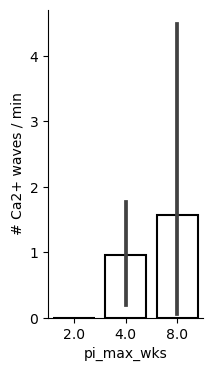

In [3]:
df = Data[(Data['institution'] == 'UoB') & (Data['region'] == 'CA1') & (Data['mouse model'] == 'wt') ]
fig, ax = plt.subplots(figsize=(2, 4))

ax=sns.barplot(data=df, x='pi_max_wks', y='freq', edgecolor='black', facecolor='none', linewidth=1.5) 
ax.set_ylabel('# Ca2+ waves / min') 

# Create figure panel 2a
Plot of the occurrence rate of aberrant Ca2+ micro-waves in CA1 at the different institutes at 6-8wks after injection of GCaMP6s or GCaMP6m.

Text(0, 0.5, '# Ca2+ waves / min')

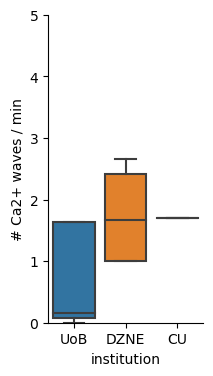

In [4]:
df = Data[(Data['region'] == 'CA1') & (Data['pi_max_wks'] > 5) & (Data['mouse model'] == 'wt') & (Data['construct'].str.contains('GCaMP6', case=False, na=False)) ]

fig, ax = plt.subplots(figsize=(2, 4))
ax=sns.boxplot(data=df, x='institution', y='freq', showfliers=False)
ax.set_ylim(0,5) 
ax.set_ylabel('# Ca2+ waves / min') 

# Create figure panel 2c
Plot of the occurrence rate of aberrant Ca2+ micro-waves in CA1 following injection with commonly used GECIs

Text(0, 0.5, '# Ca2+ waves / min')

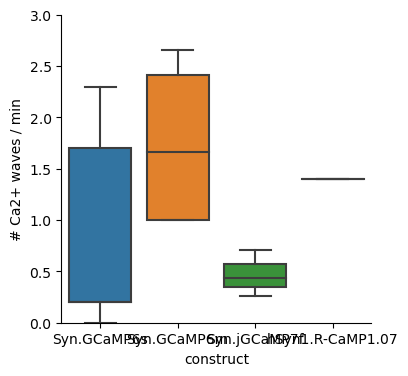

In [5]:
df = Data[(Data['pi_max_wks'] > 3) & (Data['region'] == 'CA1')]
fig, ax = plt.subplots(figsize=(4, 4))
ax=sns.boxplot(data=df, x='construct', y='freq', showfliers=False)
ax.set_ylim(0,3)
ax.set_ylabel('# Ca2+ waves / min') 

# Plot diameter for different institutes

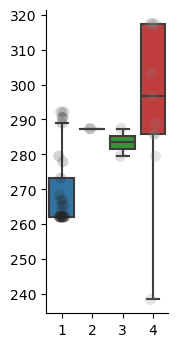

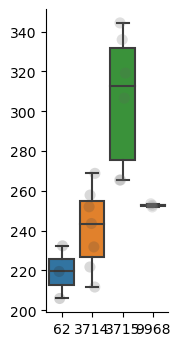

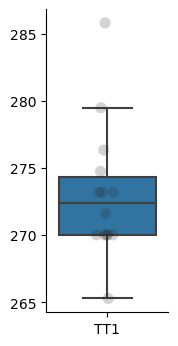

In [6]:
UoBdiam_df, fig, ax = plot_instituteData('UoB', 'diam_prof')
DZNEdiam_df, fig, ax = plot_instituteData('DZNE', 'diam_prof')
CUdiam_df, fig, ax = plot_instituteData('CU', 'diam_prof')

# Plot speed for different institutes

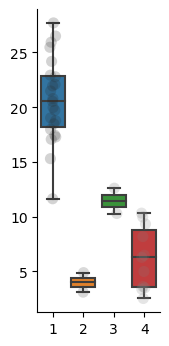

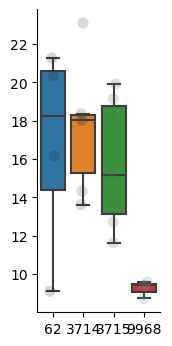

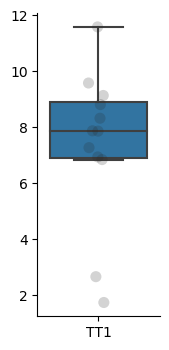

In [7]:
UoBspeed_df, fig, ax = plot_instituteData('UoB', 'speed')
DZNEspeed_df, fig, ax = plot_instituteData('DZNE', 'speed')
CUspeed_df, fig, ax = plot_instituteData('CU', 'speed')